<a href="https://colab.research.google.com/github/tlacloc/analisis-defunciones-nacimientos-2022/blob/main/Analisis_Nacimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libreria para cargar nuestro drive
from google.colab import drive

# Cargamos nuestro drive en nuestro notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'Copy of SDC11_actividad1_Badillo_Casanova.ipynb'   SDC_12		 test.ipynb
'EVC Hackathon Files'				    SDC_13		 Untitled0.ipynb
 Image						    SDC_14		 Untitled1.ipynb
 miriam						    SDC_15		 Vero
 SCD_12_Erick_Casanova.ipynb			    test-forvero.ipynb	 Visualizacion


In [ ]:
# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/miriam/nacimientos_2022.csv')
df.head(10)

<ipython-input-4-a61f0b01ece0>:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/miriam/nacimientos_2022.csv')


,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
0,1,88,997,28,1,1,09/06/1993,5,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,08/02/2022
1,1,88,997,32,2,2,13/01/1990,5,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,09/02/2022
2,1,88,997,34,2,2,18/01/1988,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,04/02/2022
3,2,7,65,27,1,1,01/09/1994,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,09/02/2022
4,2,23,4,19,1,2,10/05/2002,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,09/02/2022
5,2,23,2,21,1,1,01/05/2000,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,02/02/2022
6,2,23,2,38,1,1,24/06/1983,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,24/01/2022
7,2,23,8,21,2,2,24/03/2000,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,24/01/2022
8,2,9,10,33,2,2,17/05/1988,5,2,9,...,11.0,9,15,1,1,DFSSA003990,9,15,1,30/01/2022
9,2,9,12,42,2,2,16/12/1979,1,2,9,...,11.0,9,14,1,1,DFIST000312,9,14,1,10/02/2022


In [ ]:
oldColumns = df.columns
oldColumns

Index(['NACIOEXTRANJERO', 'ENTIDADNACIMIENTO', 'MUNICIPIONACIMIENTO', 'EDAD',
       'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'FECHANACIMIENTOMADRE',
       'ESTADOCONYUGAL', 'RESIDEEXTRANJERO', 'ENTIDADRESIDENCIA',
       'MUNICIPIORESIDENCIA', 'LOCALIDADRESIDENCIA', 'NUMEROEMBARAZOS',
       'HIJOSNACIDOSMUERTOS', 'HIJOSNACIDOSVIVOS', 'HIJOSSOBREVIVIENTES',
       'CONDICIONHIJOANTERIOR', 'VIVEHIJOANTERIOR', 'ORDENNACIMIENTO',
       'ATENCIONPRENATAL', 'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS',
       'SOBREVIVIOPARTO', 'AFILIACION', 'ESCOLARIDAD', 'INTERRUMPIOESTUDIOS',
       'CLAVEOCUPACIONHABITUAL', 'TRABAJAACTUALMENTE', 'EDADPADRE',
       'FECHANACIMIENTO', 'HORANACIMIENTO', 'SEXO', 'EDADGESTACIONAL', 'TALLA',
       'PESO', 'APGAR', 'SILVERMAN', 'TAMIZAUDITIVO', 'VACUNA_BCG',
       'VACUNAHEPATITIS_B', 'VITAMINA_A', 'VITAMINA_K', 'PRODUCTOEMBARAZO',
       'ORDENPRODUCTO', 'TOTALPRODUCTOS', 'CODIGOCIEANOMALIA1',
       'CODIGOCIEANOMALIA2', 'LUGARNACIMIENTO', 'CLUES',

Variables que sd van a utilizar

In [ ]:
# Limpieza de datos
# Se eliminaran las columnas que no se utilizaran

columnsToRemove = [
    "TAMIZAUDITIVO",
    "HIJOSSOBREVIVIENTES",
    "FECHANACIMIENTO",
    "ORDENPRODUCTO",
  "NACIOEXTRANJERO",
  "ENTIDADNACIMIENTO",
  "MUNICIPIONACIMIENTO",
  "SECONSIDERAINDIGENA",
  "HABLALENGUAINDIGENA",
  "FECHANACIMIENTOMADRE",
  "RESIDEEXTRANJERO",
  "ESTADOCONYUGAL",
  "ENTIDADRESIDENCIA",
  "MUNICIPIORESIDENCIA",
  "LOCALIDADRESIDENCIA",
  "HIJOSNACIDOSVIVOS",
  "CONDICIONHIJOANTERIOR",
  "VIVEHIJOANTERIOR",
  "ORDENNACIMIENTO",
  "AFILIACION",
  "INTERRUMPIOESTUDIOS",
  "CLAVEOCUPACIONHABITUAL",
  "TRABAJAACTUALMENTE",
  "HORANACIMIENTO",
  "VACUNA_BCG",
  "VACUNAHEPATITIS_B",
  "VITAMINA_A",
  "VITAMINA_K",
  # Relacionado a gemelos
  # "PRODUCTOEMBARAZO",
  "ORDENPRODUCTO",
  # "TOTALPRODUCTOS",
  "CLUES",
  "TIEMPOTRASLADO",
  "RESOLUCIONEMBARAZO",
  # "UTILIZOFORCEPS",
  "TIPOCESAREA",
  "PERSONALATENDIO",
  "TIPOMEDICOATENDIO",
  "MUNICIPIOPARTO",
  "LOCALIDADPARTO",
  "CERTIFICADOPOR",
  "CLUESCERTIFICA",
  "ENTIDADFEDERATIVACERTIFICA",
  "MUNICIPIOCERTIFICA",
  "LOCALIDADCERTIFICA",
  "FECHACERTIFICADO",
  "LUGARNACIMIENTO"
]

df.drop(columnsToRemove, inplace=True, axis=1)

In [ ]:
columnsToReview = df.columns
columnsToReview

Index(['EDAD', 'NUMEROEMBARAZOS', 'HIJOSNACIDOSMUERTOS', 'ATENCIONPRENATAL',
       'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS', 'SOBREVIVIOPARTO',
       'ESCOLARIDAD', 'EDADPADRE', 'SEXO', 'EDADGESTACIONAL', 'TALLA', 'PESO',
       'APGAR', 'SILVERMAN', 'PRODUCTOEMBARAZO', 'TOTALPRODUCTOS',
       'CODIGOCIEANOMALIA1', 'CODIGOCIEANOMALIA2', 'UTILIZOFORCEPS',
       'ENTIDADFEDERATIVAPARTO'],
      dtype='object')

In [ ]:
df.head(10)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,28,3,0,1,2,10.0,1,31,NaN,2,...,49,3495,9,0,1,NaN,0000,0000,8,23
1,32,5,1,1,1,8.0,1,52,NaN,1,...,41,1660,9,0,1,NaN,P071,0000,8,23
2,34,3,0,1,1,9.0,1,71,NaN,1,...,49,3100,9,0,1,NaN,0000,0000,8,23
3,27,2,1,1,1,7.0,1,51,NaN,2,...,49,2850,9,0,1,NaN,0000,0000,8,23
4,19,1,0,1,1,12.0,1,71,NaN,2,...,50,3535,9,0,1,NaN,0000,0000,8,23
5,21,1,0,1,1,9.0,1,51,NaN,2,...,53,3550,9,0,1,NaN,0000,0000,8,23
6,38,8,0,2,0,0.0,1,31,NaN,1,...,50,3155,9,0,1,NaN,0000,0000,8,23
7,21,2,0,1,2,4.0,1,82,NaN,2,...,56,3420,9,0,1,NaN,0000,0000,8,23
8,33,2,0,1,1,6.0,1,72,NaN,1,...,52,3400,9,0,1,NaN,Q699,0000,8,9
9,42,1,0,1,1,16.0,1,81,NaN,1,...,49,3052,9,0,1,NaN,0000,0000,8,9


In [ ]:
df=df.drop(df[df['EDAD']==999].index)
df=df.drop(df[df['EDAD']==888].index)
df=df.drop(df[df['NUMEROEMBARAZOS']==99].index)
df=df.drop(df[df['HIJOSNACIDOSMUERTOS']==99].index)
df=df.drop(df[df['ATENCIONPRENATAL']==9].index)
df=df.drop(df[df['TRIMESTREPRIMERCONSULTA']==9].index)
df=df.drop(df[df['TOTALCONSULTAS']==99].index)
df=df.drop(df[df['SOBREVIVIOPARTO']==9].index)
df=df.drop(df[df['ESCOLARIDAD']==999].index)
df=df.drop(df[df['EDADPADRE']==999].index)
df=df.drop(df[df['SEXO']==9].index)
df=df.drop(df[df['EDADGESTACIONAL']==99].index)
df=df.drop(df[df['TALLA']==99].index)
df=df.drop(df[df['PESO']==9999].index)
df=df.drop(df[df['TALLA']==9].index)
df=df.drop(df[df['APGAR']==99].index)
df=df.drop(df[df['SILVERMAN']==99].index)
df=df.drop(df[df['UTILIZOFORCEPS']==9].index)

In [ ]:
df.max()

EDAD                         61
NUMEROEMBARAZOS              19
HIJOSNACIDOSMUERTOS          23
ATENCIONPRENATAL              2
TRIMESTREPRIMERCONSULTA       8
TOTALCONSULTAS             30.0
SOBREVIVIOPARTO               2
ESCOLARIDAD                 132
EDADPADRE                  99.0
SEXO                          2
EDADGESTACIONAL              45
TALLA                        65
PESO                       5366
APGAR                        10
SILVERMAN                    10
PRODUCTOEMBARAZO              3
TOTALPRODUCTOS              5.0
CODIGOCIEANOMALIA1         Z208
CODIGOCIEANOMALIA2         Z208
UTILIZOFORCEPS                8
ENTIDADFEDERATIVAPARTO       32
dtype: object

medidas descriptivas

In [ ]:
df.describe().applymap('{:,.2f}'.format)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
count,"1,498,530.00","1,498,530.00","1,498,530.00","1,498,530.00","1,498,530.00","1,494,317.00","1,498,530.00","1,498,530.00","1,445,529.00","1,498,530.00","1,498,530.00","1,498,530.00","1,498,530.00","1,498,530.00","1,498,530.00","1,498,530.00","22,364.00","1,498,530.00","1,498,530.00"
mean,26.30,2.22,0.22,1.02,1.28,7.56,1.00,62.01,33.72,1.48,38.56,49.63,"3,106.21",8.88,0.28,1.01,2.02,7.91,16.49
std,6.35,1.26,0.53,0.16,0.88,3.34,0.03,19.99,17.95,0.50,1.71,2.78,467.48,0.82,1.12,0.13,0.16,0.78,7.95
min,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,7.00,365.00,0.00,0.00,0.00,2.00,0.00,1.00
25%,21.00,1.00,0.00,1.00,1.00,6.00,1.00,51.00,24.00,1.00,38.00,48.00,"2,850.00",9.00,0.00,1.00,2.00,8.00,11.00
50%,26.00,2.00,0.00,1.00,1.00,8.00,1.00,71.00,29.00,1.00,39.00,50.00,"3,110.00",9.00,0.00,1.00,2.00,8.00,15.00
75%,31.00,3.00,0.00,1.00,1.00,9.00,1.00,72.00,36.00,2.00,40.00,51.00,"3,400.00",9.00,0.00,1.00,2.00,8.00,22.00
max,61.00,19.00,23.00,2.00,8.00,30.00,2.00,132.00,99.00,2.00,45.00,65.00,"5,366.00",10.00,10.00,3.00,5.00,8.00,32.00


In [ ]:
df.mode(numeric_only=True)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,22,1,0,1,1,8.0,1,51,99.0,1,39,50,3000,9,0,1,2.0,8,15


## Agrupando por edades

In [ ]:
edades = [
    len(df[df['EDAD'] < 20]),
    len(df[(df['EDAD'] >= 20) & (df['EDAD'] < 30)]),
    len(df[(df['EDAD'] >= 30) & (df['EDAD'] < 40)]),
    len(df[(df['EDAD'] >= 40) & (df['EDAD'] < 50)]),
    len(df[df['EDAD'] >= 50])
]
labels = [
    "Menores de 20",
    "20 - 30",
    "30 - 40",
    "40 - 50",
    "Mayores de 50"]

edadesDF = pd.DataFrame({'edades': edades, 'labels': labels},
                  index=labels)

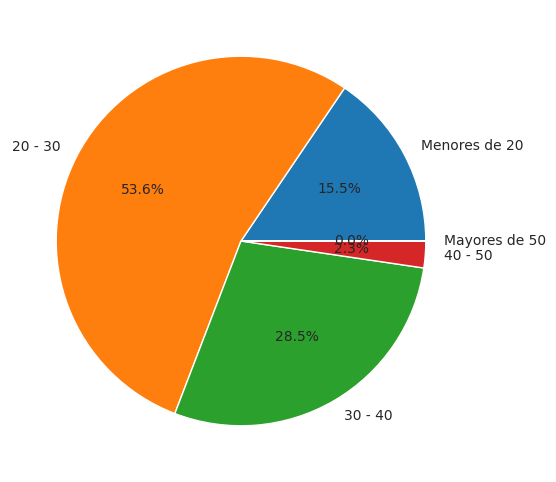

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(edadesDF['edades'], labels=edadesDF['labels'], autopct='%1.1f%%')
plt.show()

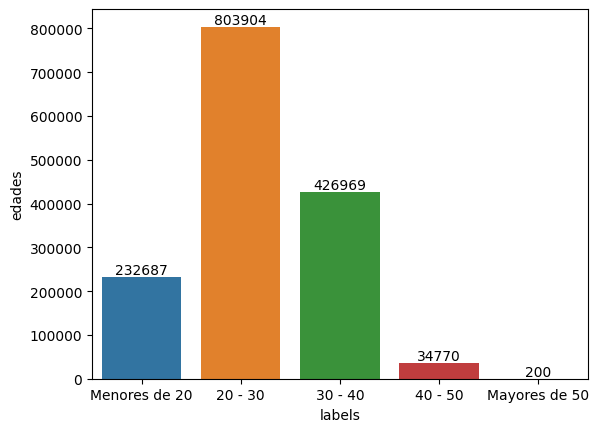

In [ ]:
ax = sns.barplot(edadesDF, y='edades', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);